In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings('ignore')

In [2]:
directory = os.path.join(os.getcwd(), 'Data')
path_train = os.path.join(directory, 'train.csv')
path_test = os.path.join(directory, 'test.csv')

In [3]:
df_train = pd.read_csv(path_train)
df_train.drop(['PassengerId'], axis=1, inplace=True)
df_test = pd.read_csv(path_test)
PassengerId = df_test['PassengerId']
df_test.drop(['PassengerId'], axis=1, inplace=True)

In [4]:
print('Train\n')
print(df_train.isna().sum(), '\n')
print('Test\n')
print(df_test.isna().sum())

Train

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64 

Test

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


In [5]:
df_train['Age'].fillna(df_train['Age'].median(), inplace = True)
df_test['Age'].fillna(df_test['Age'].median(), inplace = True)
df_train.drop(['Cabin'], axis=1, inplace=True)
df_test.drop(['Cabin'], axis=1, inplace=True)
df_train.drop(['Ticket'], axis=1, inplace=True)
df_test.drop(['Ticket'], axis=1, inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode().values[0], inplace = True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace = True)

In [6]:
print('Train\n')
print(df_train.isna().sum(), '\n')
print('Test\n')
print(df_test.isna().sum())

Train

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64 

Test

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [7]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [8]:
df_train['Name_categrc'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

df_train['Name_categrc'] = df_train['Name_categrc'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df_train['Name_categrc'] = df_train['Name_categrc'].replace('Mlle', 'Miss')
df_train['Name_categrc'] = df_train['Name_categrc'].replace('Ms', 'Miss')
df_train['Name_categrc'] = df_train['Name_categrc'].replace('Mme', 'Mrs')

mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df_train['Name_categrc'] = df_train['Name_categrc'].map(mapping)
df_train['Name_categrc'] = df_train['Name_categrc'].fillna(0)
df_train.drop(['Name'], axis=1, inplace=True)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_categrc
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,5
887,1,1,female,19.0,0,0,30.0000,S,2
888,0,3,female,28.0,1,2,23.4500,S,2
889,1,1,male,26.0,0,0,30.0000,C,1


In [9]:
df_test['Name_categrc'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

df_test['Name_categrc'] = df_test['Name_categrc'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df_test['Name_categrc'] = df_test['Name_categrc'].replace('Mlle', 'Miss')
df_test['Name_categrc'] = df_test['Name_categrc'].replace('Ms', 'Miss')
df_test['Name_categrc'] = df_test['Name_categrc'].replace('Mme', 'Mrs')

mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df_test['Name_categrc'] = df_test['Name_categrc'].map(mapping)
df_test['Name_categrc'] = df_test['Name_categrc'].fillna(0)
df_test.drop(['Name'], axis=1, inplace=True)
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_categrc
0,3,male,34.5,0,0,7.8292,Q,1
1,3,female,47.0,1,0,7.0000,S,3
2,2,male,62.0,0,0,9.6875,Q,1
3,3,male,27.0,0,0,8.6625,S,1
4,3,female,22.0,1,1,12.2875,S,3
...,...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S,1
414,1,female,39.0,0,0,108.9000,C,5
415,3,male,38.5,0,0,7.2500,S,1
416,3,male,27.0,0,0,8.0500,S,1


In [10]:
df_train['Sex'] = df_train['Sex'].apply(lambda x: 1 if x == 'male' else 0)
mapping = {"S": 0, "C": 1, "Q": 2}
df_train['Embarked'] = df_train['Embarked'].map(mapping)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_categrc
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,1,3
2,1,3,0,26.0,0,0,7.9250,0,2
3,1,1,0,35.0,1,0,53.1000,0,3
4,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,5
887,1,1,0,19.0,0,0,30.0000,0,2
888,0,3,0,28.0,1,2,23.4500,0,2
889,1,1,1,26.0,0,0,30.0000,1,1


In [11]:
df_test['Sex'] = df_test['Sex'].apply(lambda x: 1 if x == 'male' else 0)
mapping = {"S": 0, "C": 1, "Q": 2}
df_test['Embarked'] = df_test['Embarked'].map(mapping)
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_categrc
0,3,1,34.5,0,0,7.8292,2,1
1,3,0,47.0,1,0,7.0000,0,3
2,2,1,62.0,0,0,9.6875,2,1
3,3,1,27.0,0,0,8.6625,0,1
4,3,0,22.0,1,1,12.2875,0,3
...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,0,1
414,1,0,39.0,0,0,108.9000,1,5
415,3,1,38.5,0,0,7.2500,0,1
416,3,1,27.0,0,0,8.0500,0,1


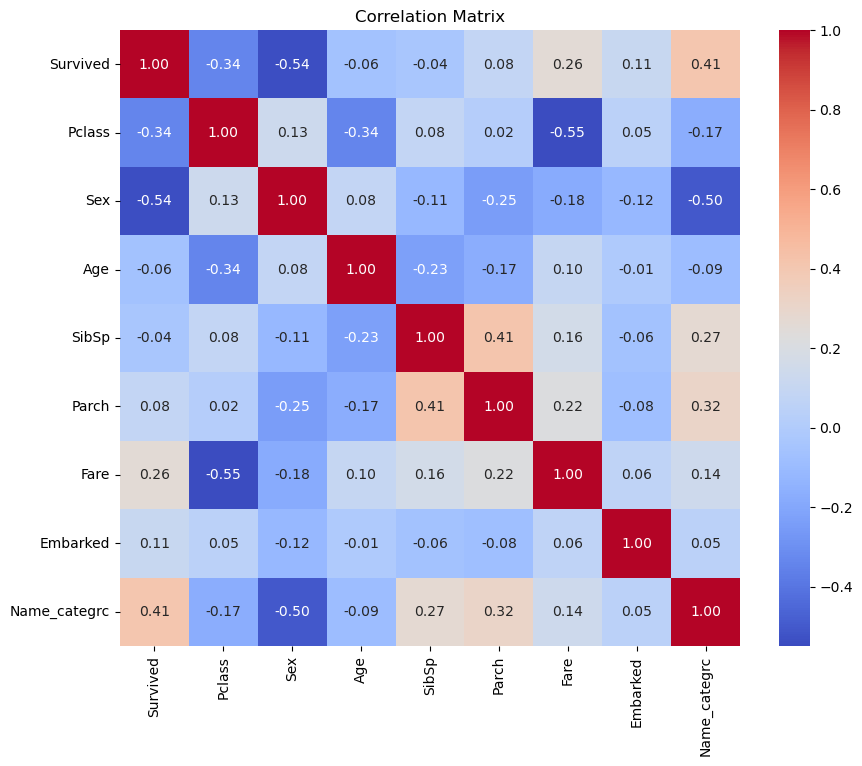

In [12]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})

plt.title('Correlation Matrix')
plt.show()

In [13]:
df_train['Family'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['Family'] = df_test['SibSp'] + df_test['Parch'] + 1

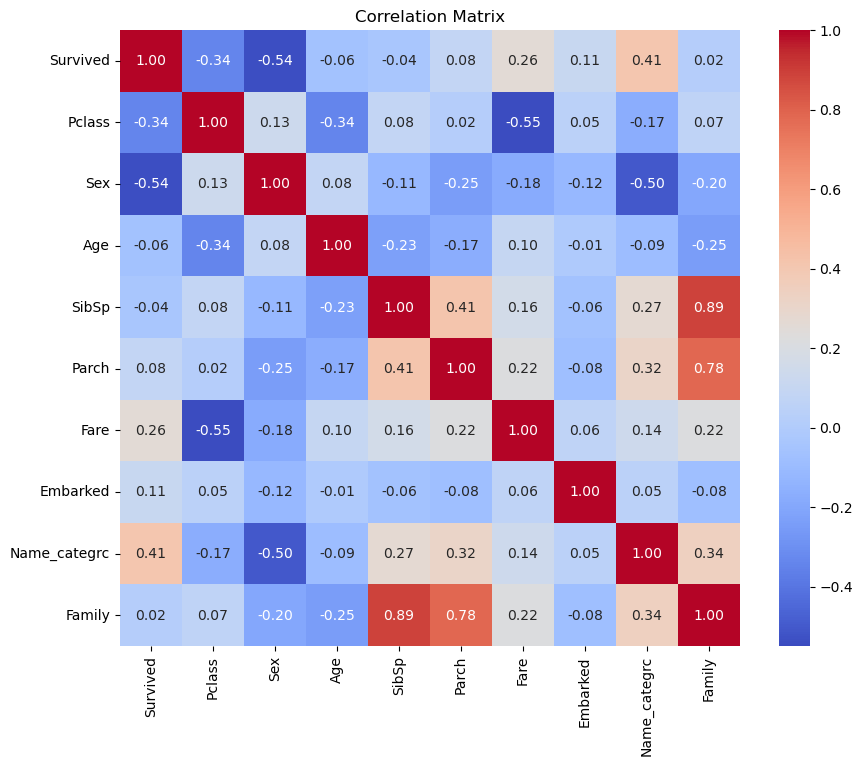

In [14]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})

plt.title('Correlation Matrix')
plt.show()

In [15]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_categrc,Family
0,0,3,1,22.0,1,0,7.2500,0,1,2
1,1,1,0,38.0,1,0,71.2833,1,3,2
2,1,3,0,26.0,0,0,7.9250,0,2,1
3,1,1,0,35.0,1,0,53.1000,0,3,2
4,0,3,1,35.0,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,5,1
887,1,1,0,19.0,0,0,30.0000,0,2,1
888,0,3,0,28.0,1,2,23.4500,0,2,4
889,1,1,1,26.0,0,0,30.0000,1,1,1


In [16]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_categrc,Family
0,3,1,34.5,0,0,7.8292,2,1,1
1,3,0,47.0,1,0,7.0000,0,3,2
2,2,1,62.0,0,0,9.6875,2,1,1
3,3,1,27.0,0,0,8.6625,0,1,1
4,3,0,22.0,1,1,12.2875,0,3,3
...,...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,0,1,1
414,1,0,39.0,0,0,108.9000,1,5,1
415,3,1,38.5,0,0,7.2500,0,1,1
416,3,1,27.0,0,0,8.0500,0,1,1


In [17]:
df_train['Alone'] = df_train['Family'].apply(lambda x: 0 if x == 1 else 1)
df_test['Alone'] = df_test['Family'].apply(lambda x: 0 if x == 1 else 1)

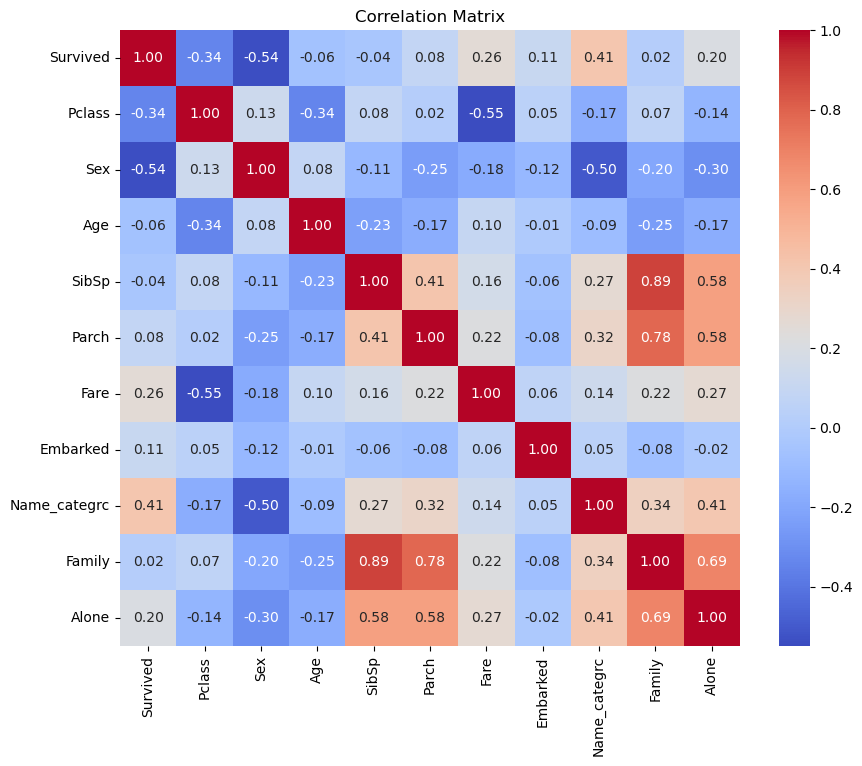

In [18]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})

plt.title('Correlation Matrix')
plt.show()

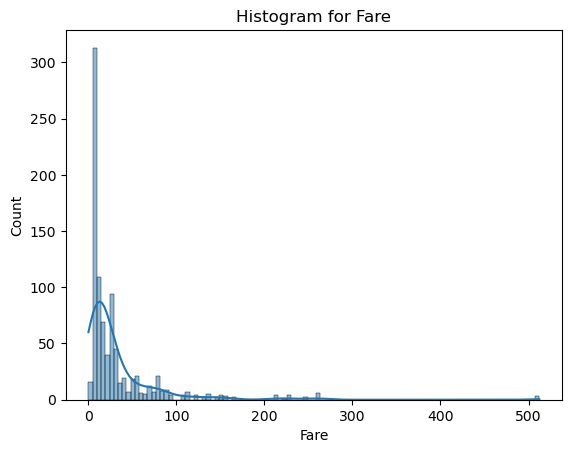

In [19]:
sns.histplot(df_train['Fare'], kde=True)
plt.title(f'Histogram for Fare')
plt.show()

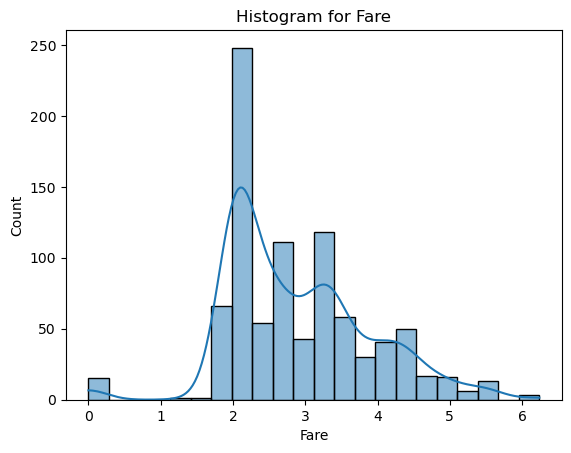

In [20]:
sns.histplot(df_train["Fare"].map(lambda x: np.log(x) if x > 0 else 0), kde=True)
plt.title(f'Histogram for Fare')
plt.show()

In [21]:
df_train["Fare"] = df_train["Fare"].map(lambda x: np.log(x) if x > 0 else 0)
df_test["Fare"] = df_test["Fare"].map(lambda x: np.log(x) if x > 0 else 0)

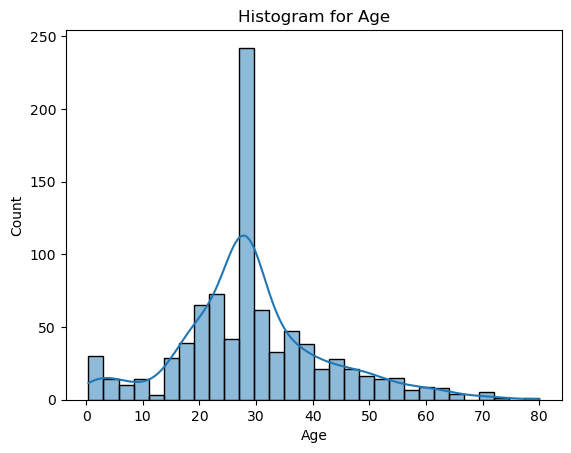

In [22]:
sns.histplot(df_train['Age'], kde=True)
plt.title(f'Histogram for Age')
plt.show()

In [23]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_categrc,Family,Alone
0,0,3,1,22.0,1,0,1.981001,0,1,2,1
1,1,1,0,38.0,1,0,4.266662,1,3,2,1
2,1,3,0,26.0,0,0,2.070022,0,2,1,0
3,1,1,0,35.0,1,0,3.972177,0,3,2,1
4,0,3,1,35.0,0,0,2.085672,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,2.564949,0,5,1,0
887,1,1,0,19.0,0,0,3.401197,0,2,1,0
888,0,3,0,28.0,1,2,3.154870,0,2,4,1
889,1,1,1,26.0,0,0,3.401197,1,1,1,0


In [24]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_categrc,Family,Alone
0,3,1,34.5,0,0,2.057860,2,1,1,0
1,3,0,47.0,1,0,1.945910,0,3,2,1
2,2,1,62.0,0,0,2.270836,2,1,1,0
3,3,1,27.0,0,0,2.159003,0,1,1,0
4,3,0,22.0,1,1,2.508582,0,3,3,1
...,...,...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,2.085672,0,1,1,0
414,1,0,39.0,0,0,4.690430,1,5,1,0
415,3,1,38.5,0,0,1.981001,0,1,1,0
416,3,1,27.0,0,0,2.085672,0,1,1,0


In [25]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

In [26]:
scaler = MinMaxScaler()
fare = scaler.fit_transform(df_train[['Fare']])
df_train['Fare'] = fare
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_categrc,Family,Alone
0,0,3,1,22.0,1,0,0.317521,0,1,2,1
1,1,1,0,38.0,1,0,0.683873,1,3,2,1
2,1,3,0,26.0,0,0,0.331789,0,2,1,0
3,1,1,0,35.0,1,0,0.636672,0,3,2,1
4,0,3,1,35.0,0,0,0.334298,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,0.411118,0,5,1,0
887,1,1,0,19.0,0,0,0.545154,0,2,1,0
888,0,3,0,28.0,1,2,0.505672,0,2,4,1
889,1,1,1,26.0,0,0,0.545154,1,1,1,0


In [27]:
fare = scaler.transform(df_test[['Fare']])
df_test['Fare'] = fare
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_categrc,Family,Alone
0,3,1,34.5,0,0,0.329840,2,1,1,0
1,3,0,47.0,1,0,0.311896,0,3,2,1
2,2,1,62.0,0,0,0.363976,2,1,1,0
3,3,1,27.0,0,0,0.346051,0,1,1,0
4,3,0,22.0,1,1,0.402083,0,3,3,1
...,...,...,...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,0.334298,0,1,1,0
414,1,0,39.0,0,0,0.751796,1,5,1,0
415,3,1,38.5,0,0,0.317521,0,1,1,0
416,3,1,27.0,0,0,0.334298,0,1,1,0


In [28]:
scaler = MinMaxScaler()
Age = scaler.fit_transform(df_train[['Age']])
df_train['Age'] = Age
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_categrc,Family,Alone
0,0,3,1,0.271174,1,0,0.317521,0,1,2,1
1,1,1,0,0.472229,1,0,0.683873,1,3,2,1
2,1,3,0,0.321438,0,0,0.331789,0,2,1,0
3,1,1,0,0.434531,1,0,0.636672,0,3,2,1
4,0,3,1,0.434531,0,0,0.334298,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0.334004,0,0,0.411118,0,5,1,0
887,1,1,0,0.233476,0,0,0.545154,0,2,1,0
888,0,3,0,0.346569,1,2,0.505672,0,2,4,1
889,1,1,1,0.321438,0,0,0.545154,1,1,1,0


In [29]:
Age = scaler.transform(df_test[['Age']])
df_test['Age'] = Age
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_categrc,Family,Alone
0,3,1,0.428248,0,0,0.329840,2,1,1,0
1,3,0,0.585323,1,0,0.311896,0,3,2,1
2,2,1,0.773813,0,0,0.363976,2,1,1,0
3,3,1,0.334004,0,0,0.346051,0,1,1,0
4,3,0,0.271174,1,1,0.402083,0,3,3,1
...,...,...,...,...,...,...,...,...,...,...
413,3,1,0.334004,0,0,0.334298,0,1,1,0
414,1,0,0.484795,0,0,0.751796,1,5,1,0
415,3,1,0.478512,0,0,0.317521,0,1,1,0
416,3,1,0.334004,0,0,0.334298,0,1,1,0


In [30]:
classifiers = [
    SVC(random_state=42),
    DecisionTreeClassifier(random_state=42),
    AdaBoostClassifier(DecisionTreeClassifier(random_state=42), random_state=42, learning_rate=0.1),
    RandomForestClassifier(random_state=42),
    MLPClassifier(random_state=42),
    KNeighborsClassifier(),
    LogisticRegression(random_state=42),
    XGBClassifier(random_state=42)
]

X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:, 1:], df_train['Survived'], stratify=df_train['Survived'], random_state=42)
kfold = StratifiedKFold(n_splits=5)

cv_results = []
score_test = []
for classifier in classifiers:
    model = Pipeline(steps=[('classifier', classifier)])
    model.fit(X_train, y_train)
    cv_results.append(cross_val_score(model, X_train, y=y_train, scoring="accuracy", cv=kfold, n_jobs=-1))
    score_test.append(model.score(X_test, y_test))

cv_means = [cv_result.mean() for cv_result in cv_results]
cv_std = [cv_result.std() for cv_result in cv_results]

/home/sv/anaconda3/envs/Camp/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sv/anaconda3/envs/Camp/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sv/anaconda3/envs/Camp/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sv/anaconda3/envs/Camp/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sv/ana

In [31]:
cv_res = pd.DataFrame({'Cross_Val_Means': cv_means, 'Cross_Valstd': cv_std})
cv_res.index = ['SVC', 'DecisionTree', 'AdaBoost', 'RandomForest', 'MLP', 'KNe', 'LogisticRegression', 'XGB']
cv_res['Score_test'] = score_test
cv_res

,Cross_Val_Means,Cross_Valstd,Score_test
SVC,0.827853,0.027052,0.820628
DecisionTree,0.765043,0.026368,0.762332
AdaBoost,0.775457,0.010385,0.762332
RandomForest,0.818876,0.027198,0.798206
MLP,0.812905,0.019757,0.843049
KNe,0.818842,0.019309,0.780269
LogisticRegression,0.815890,0.029184,0.798206
XGB,0.800920,0.014343,0.789238


In [32]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'degree': [1, 2, 3, 4, 5],
    'gamma': ['scale', 'auto']
}

kfold = StratifiedKFold(n_splits=4)

model = SVC(random_state=42)

grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=kfold, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.2f}".format(grid_search.best_score_))

test_accuracy = grid_search.score(X_test, y_test)
print("Test Set Accuracy: {:.2f}".format(test_accuracy))


Best Parameters:  {'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.83
Test Set Accuracy: 0.82


In [33]:
df_re = pd.DataFrame(PassengerId, columns=['PassengerId'])
df_re['Survived'] = grid_search.predict(df_test.values)
df_re.to_csv('Result.csv', index=False)

In [34]:
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score
import xgboost as xgb
from hyperopt import hp, Trials, fmin, tpe, STATUS_OK

space={'max_depth': hp.choice('max_depth', np.arange(5, 15, dtype=int)),
        'n_estimators': hp.choice('n_estimators', np.arange(50, 800, 10)),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'seed': 42
    }

def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric=['error'],
            early_stopping_rounds=10, verbose=False)
    

    pred = clf.predict(X_test)
    auc = roc_auc_score(y_test, pred)
    aucpr = average_precision_score(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    result = {
        'loss': -accuracy,
        'auc': auc,
        'aucpr': aucpr,
        'hyperparameters': space,
        'status': STATUS_OK
    }
    return result

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 1000,
                        trials = trials)

100%|████| 1000/1000 [01:11<00:00, 14.08trial/s, best loss: -0.7847533632286996]


In [35]:
all_results = trials.results
all_hyperparameters = [result['hyperparameters'] for result in all_results]
all_loss = [result['loss'] for result in all_results]
all_auc = [result['auc'] for result in all_results]
all_prauc = [result['aucpr'] for result in all_results]

In [36]:
hyperparam = pd.DataFrame(all_hyperparameters)
metrics = pd.DataFrame([all_loss, all_auc, all_prauc]).T
metrics.columns = ['loss', 'auc', 'prauc']
df_result = pd.concat([hyperparam, metrics], axis=1)
df_result

,colsample_bytree,gamma,max_depth,min_child_weight,n_estimators,reg_alpha,reg_lambda,seed,loss,auc,prauc
0,0.672165,2.041691,11,4.0,780,147.0,0.385215,42,-0.614350,0.500000,0.385650
1,0.503996,2.637589,8,6.0,420,100.0,0.377893,42,-0.614350,0.500000,0.385650
2,0.589612,7.361064,5,5.0,670,105.0,0.800626,42,-0.614350,0.500000,0.385650
3,0.890355,8.554363,6,2.0,330,128.0,0.105015,42,-0.614350,0.500000,0.385650
4,0.546093,8.967707,10,1.0,690,118.0,0.570163,42,-0.614350,0.500000,0.385650
...,...,...,...,...,...,...,...,...,...,...,...
995,0.918274,1.986519,8,4.0,490,45.0,0.094282,42,-0.780269,0.754074,0.620855
996,0.868249,2.159435,12,1.0,620,46.0,0.220905,42,-0.780269,0.754074,0.620855
997,0.898628,1.861783,12,3.0,600,40.0,0.209741,42,-0.766816,0.747454,0.602283
998,0.912076,2.672731,8,4.0,110,50.0,0.081833,42,-0.771300,0.742446,0.608021


In [37]:
best_metrics = trials.best_trial['result']
best_auc = best_metrics['auc']
best_prauc = best_metrics['aucpr']
best_loss = best_metrics['loss']
best = pd.DataFrame([best_hyperparams])
best['loss'] = best_loss
best['auc'] = best_auc
best['auc_pr'] = best_prauc
best = best.T
best.columns = ['parameters']
best

,parameters
colsample_bytree,0.822877
gamma,1.135289
max_depth,0.000000
min_child_weight,3.000000
n_estimators,69.000000
reg_alpha,49.000000
reg_lambda,0.361727
loss,-0.784753
auc,0.757724
auc_pr,0.627547


In [38]:
best_params = {
    'n_estimators': trials.best_trial['result']['hyperparameters']['n_estimators'],
    'max_depth': trials.best_trial['result']['hyperparameters']['max_depth'],
    'gamma': trials.best_trial['result']['hyperparameters']['gamma'],
    'reg_alpha': trials.best_trial['result']['hyperparameters']['reg_alpha'],
    'min_child_weight': trials.best_trial['result']['hyperparameters']['min_child_weight'],
    'colsample_bytree': trials.best_trial['result']['hyperparameters']['colsample_bytree']
}

clf = xgb.XGBClassifier(**best_params)

In [39]:
evaluation = [( X_train, y_train), ( X_test, y_test)]
    
clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric=["error", "auc", "aucpr", "logloss"],
            early_stopping_rounds=10, verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8228770581461328, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.1352885668130805, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=3.0, missing=nan,
              monotone_constraints=None, n_estimators=740, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [40]:
pd_train = pd.DataFrame(clf.evals_result()['validation_0'])
pd_train.columns = ['error', 'auc_train', 'aucpr_train', 'logloss_train']
pd_test = pd.DataFrame(clf.evals_result()['validation_1'])
pd_test.columns = ['error', 'auc_test', 'aucpr_test', 'logloss_test']
pd.concat([pd_train, pd_test], axis=1)

,error,auc_train,aucpr_train,logloss_train,error,auc_test,aucpr_test,logloss_test
0,0.172156,0.818061,0.739803,0.632853,0.183857,0.794687,0.711933,0.637909
1,0.188623,0.830448,0.738335,0.599307,0.206278,0.802156,0.701887,0.608940
2,0.191617,0.830571,0.738138,0.576728,0.215247,0.801307,0.699600,0.588794
3,0.172156,0.831766,0.739739,0.560802,0.188341,0.804872,0.704023,0.574791
4,0.172156,0.831766,0.739739,0.552907,0.188341,0.804872,0.704023,0.567981
5,0.191617,0.844826,0.745656,0.545885,0.215247,0.820786,0.708512,0.562082
6,0.191617,0.844840,0.745667,0.539485,0.215247,0.820786,0.708512,0.557553
7,0.191617,0.844840,0.745667,0.539485,0.215247,0.820786,0.708512,0.557553
8,0.191617,0.844840,0.745667,0.539485,0.215247,0.820786,0.708512,0.557553
9,0.191617,0.844840,0.745667,0.539485,0.215247,0.820786,0.708512,0.557553


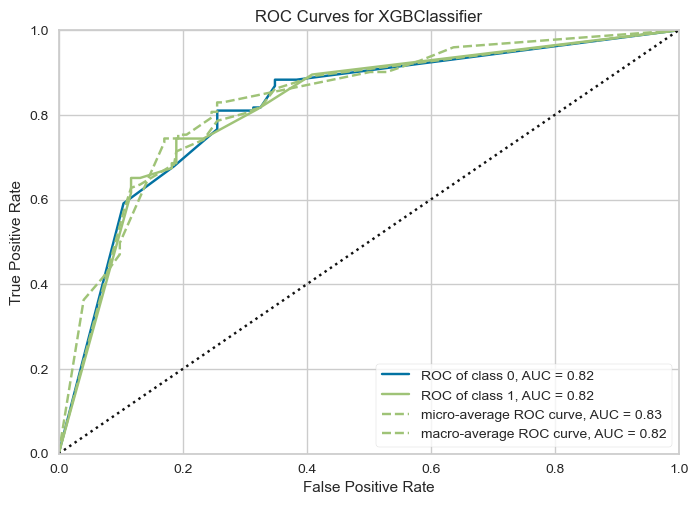

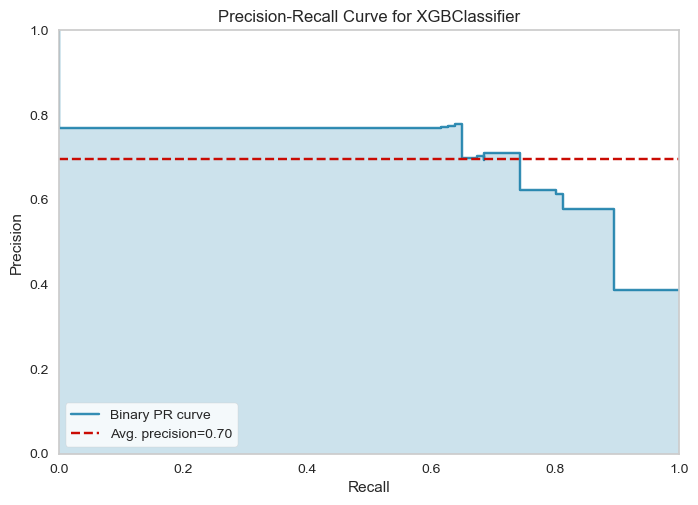

In [41]:
from yellowbrick.classifier import ClassificationReport, ROCAUC, PrecisionRecallCurve

roc_auc_visualizer = ROCAUC(clf, classes=df_train['Survived'])
roc_auc_visualizer.fit(X_train, y_train)
roc_auc_visualizer.score(X_test, y_test)
roc_auc_visualizer.show()

pr_auc_visualizer = PrecisionRecallCurve(clf, classes=df_train['Survived'])
pr_auc_visualizer.fit(X_train, y_train)
pr_auc_visualizer.score(X_test, y_test)
pr_auc_visualizer.show();

In [42]:
df_xgb = pd.DataFrame(PassengerId, columns=['PassengerId'])
df_xgb['Survived'] = clf.predict(df_test.values)
df_xgb.to_csv('Result_xgb.csv', index=False)

In [43]:
clf.score(X_test, y_test)

0.7847533632286996

In [56]:
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score
from sklearn.svm import SVC
from hyperopt import hp, Trials, fmin, tpe, STATUS_OK


space = {
    'C': hp.choice('C', np.arange(0.005,1.0,0.01)),
    'kernel': hp.choice('kernel', ['linear', 'rbf', 'poly', 'sigmoid']),
    'gamma': hp.choice('gamma', ['auto', 'scale']),
    'degree': hp.quniform('degree', 2, 5, 1),
    'coef0': hp.uniform('coef0', -1, 1),
    'shrinking': hp.choice('shrinking', [True, False]),
    'probability': hp.choice('probability', [True, False]),
    'random_state': 0
}

def objective(space):
    clf = SVC(
        C=space['C'],
        kernel=space['kernel'],
        probability=space['probability']
    )

    clf.fit(X_train, y_train)

    pred = clf.predict(X_test)
    auc = roc_auc_score(y_test, pred)
    aucpr = average_precision_score(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    result = {
        'loss': -accuracy,
        'auc': auc,
        'aucpr': aucpr,
        'hyperparameters': space,
        'status': STATUS_OK
    }
    return result

trials = Trials()

best_hyperparams = fmin(fn=objective,
                        space=space,
                        algo=tpe.suggest,
                        max_evals=1000,
                        trials=trials)


100%|█████| 1000/1000 [01:01<00:00, 16.35trial/s, best loss: -0.820627802690583]


In [57]:
all_results = trials.results
all_hyperparameters = [result['hyperparameters'] for result in all_results]
all_loss = [result['loss'] for result in all_results]
all_auc = [result['auc'] for result in all_results]
all_prauc = [result['aucpr'] for result in all_results]

In [58]:
hyperparam = pd.DataFrame(all_hyperparameters)
metrics = pd.DataFrame([all_loss, all_auc, all_prauc]).T
metrics.columns = ['loss', 'auc', 'prauc']
df_result = pd.concat([hyperparam, metrics], axis=1)
df_result

,C,coef0,degree,gamma,kernel,probability,random_state,shrinking,loss,auc,prauc
0,0.075,0.258380,3.0,scale,sigmoid,False,0,True,-0.807175,0.773808,0.665144
1,0.255,-0.589097,3.0,scale,poly,True,0,True,-0.807175,0.791122,0.659446
2,0.525,-0.132538,2.0,auto,poly,False,0,True,-0.811659,0.796936,0.665958
3,0.535,0.708699,5.0,scale,sigmoid,True,0,True,-0.739910,0.703913,0.564070
4,0.565,-0.883935,5.0,scale,poly,True,0,False,-0.811659,0.796936,0.665958
...,...,...,...,...,...,...,...,...,...,...,...
995,0.675,0.022839,2.0,scale,rbf,False,0,True,-0.820628,0.804235,0.680029
996,0.675,-0.012373,2.0,scale,linear,False,0,True,-0.802691,0.787472,0.652717
997,0.105,0.796031,3.0,auto,rbf,True,0,False,-0.798206,0.779494,0.646471
998,0.545,-0.068142,3.0,scale,rbf,False,0,True,-0.811659,0.792607,0.666818


In [59]:
best_metrics = trials.best_trial['result']
best_auc = best_metrics['auc']
best_prauc = best_metrics['aucpr']
best_loss = best_metrics['loss']
best = pd.DataFrame([best_hyperparams])
best['loss'] = best_loss
best['auc'] = best_auc
best['auc_pr'] = best_prauc
best = best.T
best.columns = ['parameters']
best

,parameters
C,78.000000
coef0,-0.100234
degree,3.000000
gamma,1.000000
kernel,1.000000
probability,1.000000
shrinking,0.000000
loss,-0.820628
auc,0.804235
auc_pr,0.680029


In [60]:
best_params = {
    'C': trials.best_trial['result']['hyperparameters']['C'],
    'coef0': trials.best_trial['result']['hyperparameters']['coef0'],
    'degree': int(trials.best_trial['result']['hyperparameters']['degree']),
    'gamma': trials.best_trial['result']['hyperparameters']['gamma'],
    'kernel': trials.best_trial['result']['hyperparameters']['kernel'],
    'probability': trials.best_trial['result']['hyperparameters']['probability'],
    'shrinking': trials.best_trial['result']['hyperparameters']['shrinking'],
    'random_state': 0
}

clf = SVC(**best_params)

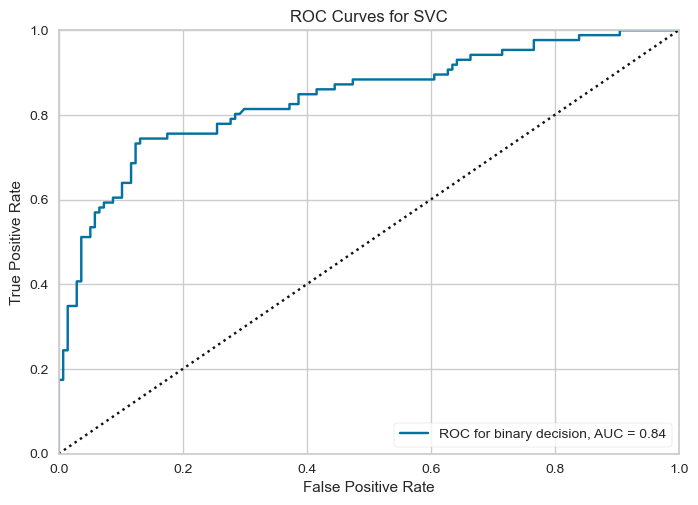

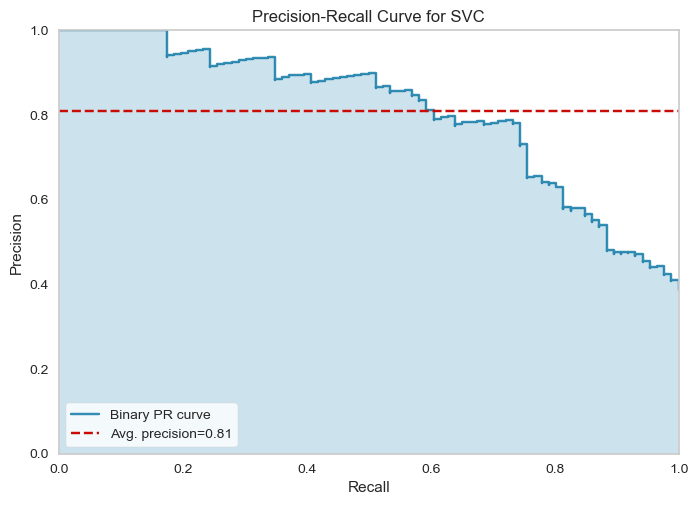

In [64]:
from yellowbrick.classifier import ClassificationReport, ROCAUC, PrecisionRecallCurve

roc_auc_visualizer = ROCAUC(clf, classes=df_train['Survived'], binary=True)
roc_auc_visualizer.fit(X_train, y_train)
roc_auc_visualizer.score(X_test, y_test)
roc_auc_visualizer.show()

pr_auc_visualizer = PrecisionRecallCurve(clf, classes=df_train['Survived'])
pr_auc_visualizer.fit(X_train, y_train)
pr_auc_visualizer.score(X_test, y_test)
pr_auc_visualizer.show();

In [65]:
clf.score(X_test, y_test)

0.820627802690583

In [66]:
df_svc = pd.DataFrame(PassengerId, columns=['PassengerId'])
df_svc['Survived'] = clf.predict(df_test.values)
df_xgb.to_csv('Result_svc.csv', index=False)